In [ ]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 8.7 MB/s eta 0:00:00


In [ ]:
#Libraries for hyper parameter tunning
import tensorflow as tf
from tensorflow import keras
import numpy as np
# import keras_tuner
# from keras_tuner import RandomSearch
# from keras_tuner.engine.hyperparameters import HyperParameters
#Libraries to create the model
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.layers import BatchNormalization, Dropout, Flatten, Dense
from keras.models import Sequential


In [ ]:
tf.__version__

'2.17.0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# image_directory = "/content/images/"
images = ('/content/drive/My Drive/images')


df = pd.read_csv('/content/dataset.csv')
print(df.head(5))
print(df.columns)

  filename  Balanced  Crossbar  High Crossbar  Left Do Crossbar  \
0    0.png                   1              0                 0   
1    1.png                   1              0                 0   
2    2.png                   1              0                 0   
3    3.png                   0              0                 0   
4    4.png                   1              1                 0   

   Short Length Crossbar  Down Sloping  Right Do Crossbar  Upsloping  \
0                      1             0                  0          0   
1                      0             0                  1          1   
2                      0             0                  0          1   
3                      0             0                  1          0   
4                      0             0                  0          0   

   Lengthy Crossbar  Flat Crossbar  Low Crossbar  Medium Length Crossbar  
0                 0              1             0                       0  
1             

In [ ]:
#preparing X
#from tensorflow.keras.preprocessing.image.load_img import load_img
X_dataset = []
for i in tqdm(range(df.shape[0])):
    img = tf.keras.utils.load_img(images +'/'+df['filename'][i], color_mode='grayscale')
    img =  tf.keras.utils.img_to_array(img)
    img = img/255.0
    X_dataset.append(img)
X = np.array(X_dataset)

100%|██████████| 1996/1996 [00:02<00:00, 777.09it/s]


In [ ]:
import csv

# initialize the lists to store the values
y_t1 = []
y_t2 = []
y_t3 = []
y_t4 = []
y_t5 = []
y_t6 = []
y_t7 = []
y_t8 = []
y_t9 = []
y_t10 = []
y_t11 = []

with open('/content/dataset.csv', 'r') as file:
    reader = csv.reader(file)
    # skip the first row (header)
    next(reader)

    # iterate through each row and extract the values from columns 2 to 12
    for row in reader:
        y_t1.append(float(row[1]))
        y_t2.append(float(row[2]))
        y_t3.append(float(row[3]))
        y_t4.append(float(row[4]))
        y_t5.append(float(row[5]))
        y_t6.append(float(row[6]))
        y_t7.append(float(row[7]))
        y_t8.append(float(row[8]))
        y_t9.append(float(row[9]))
        y_t10.append(float(row[10]))
        y_t11.append(float(row[11]))


In [ ]:
y_t1 = np.array(y_t1)
y_t2 = np.array(y_t2)
y_t3 = np.array(y_t3)
y_t4 = np.array(y_t4)
y_t5 = np.array(y_t5)
y_t6 = np.array(y_t6)
y_t7 = np.array(y_t7)
y_t8 = np.array(y_t8)
y_t9 = np.array(y_t9)
y_t10 = np.array(y_t10)
y_t11 = np.array(y_t11)

In [ ]:
y_t1.shape

(1996,)

In [ ]:
x_train, x_test, y_train1, y_test1 = train_test_split(X, y_t1, random_state=8, test_size = 0.10)
x_train.shape

(1796, 28, 28, 1)

In [ ]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

<ipython-input-10-2bbfbe7dae29>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


In [ ]:
def build_model(hp):
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='binary_crossentropy',
              metrics=['accuracy'])

  return model

In [ ]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=10,directory='output')

In [ ]:
tuner_search.search(x_train, y_train1,epochs=10, validation_data=(x_test, y_test1))

Trial 10 Complete [00h 00m 11s]
val_accuracy: 0.6499999761581421

Best val_accuracy So Far: 0.8100000023841858
Total elapsed time: 00h 01m 40s


In [ ]:
model = tuner_search.get_best_models(num_models=1)[0]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        51264     
                                                                 
 flatten (Flatten)           (None, 30976)             0         
                                                                 
 dense (Dense)               (None, 80)                2478160   
                                                                 
 dense_1 (Dense)             (None, 1)                 81        
                                                                 
Total params: 2,529,825
Trainable params: 2,529,825
Non-trainable params: 0
_________________________________________________________________


## T1

In [ ]:
M1 = model.save('M1.h5')

In [ ]:
x_train, x_test, y_train1, y_test1 = train_test_split(X, y_t1, random_state=8, test_size = 0.10)
x_train.shape

(1796, 28, 28, 1)

In [ ]:
M1 = keras.models.load_model('M1.h5')

In [ ]:
M1.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])

history = M1.fit(x_train, y_train1, epochs=20, validation_data=(x_test, y_test1), batch_size=32)

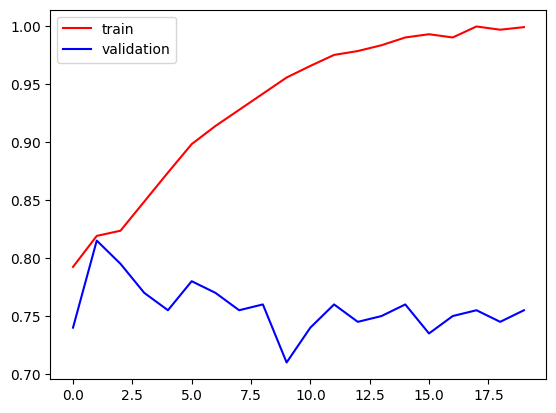

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
model.save('M1.h5',M1)
M1.save_weights('model1_weights.h5')

In [ ]:
model3 = Sequential()

model3.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation="relu", input_shape=(28,28,1)))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.15))

model3.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(BatchNormalization())
model3.add(Dropout(0.15))

model3.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation="relu"))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(BatchNormalization())
model3.add(Dropout(0.12))

model3.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(BatchNormalization())
model3.add(Dropout(0.12))

model3.add(Flatten())
model3.add(Dense(1024, activation='relu'))
model3.add(Dropout(0.1))
model3.add(Dense(512, activation='relu'))
model3.add(Dropout(0.1))
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.1))
model3.add(Dense(1, activation='sigmoid'))

In [ ]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 batch_normalization_8 (Batc  (None, 28, 28, 16)       64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 dropout_14 (Dropout)        (None, 14, 14, 16)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 32)        

In [ ]:
model3.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model3.fit(x_train, y_train1, epochs=20, validation_data=(x_test, y_test1), batch_size=32)

Epoch 1/20
57/57 [==============================] - 0s 8ms/step - loss: 0.1200 - accuracy: 0.9521 - val_loss: 0.9487 - val_accuracy: 0.7750
Epoch 2/20
57/57 [==============================] - 0s 8ms/step - loss: 0.1282 - accuracy: 0.9577 - val_loss: 0.9512 - val_accuracy: 0.7800
Epoch 3/20
57/57 [==============================] - 0s 8ms/step - loss: 0.1016 - accuracy: 0.9599 - val_loss: 1.2334 - val_accuracy: 0.7350
Epoch 4/20
57/57 [==============================] - 0s 8ms/step - loss: 0.0941 - accuracy: 0.9644 - val_loss: 1.0679 - val_accuracy: 0.7650
Epoch 5/20
57/57 [==============================] - 0s 9ms/step - loss: 0.0697 - accuracy: 0.9755 - val_loss: 1.1901 - val_accuracy: 0.7550
Epoch 6/20
57/57 [==============================] - 0s 9ms/step - loss: 0.1513 - accuracy: 0.9465 - val_loss: 0.9558 - val_accuracy: 0.7300
Epoch 7/20
57/57 [==============================] - 0s 8ms/step - loss: 0.1123 - accuracy: 0.9605 - val_loss: 1.1345 - val_accuracy: 0.7500
Epoch 8/20
57/57 [==

In [ ]:
model.save('zM1.h5',M1)
M1.save_weights('zmodel1_weights.h5')

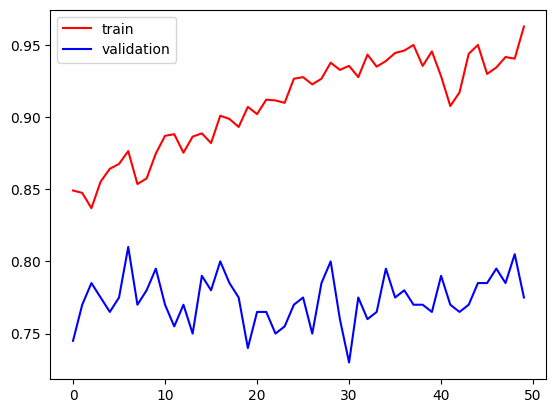

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
model4 = Sequential()

model4.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation="relu", input_shape=(28,28,1)))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.15))

model4.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(BatchNormalization())
model4.add(Dropout(0.15))

model4.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation="relu"))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(BatchNormalization())
model4.add(Dropout(0.12))

model4.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(BatchNormalization())
model4.add(Dropout(0.12))

model4.add(Flatten())
model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.1))
model4.add(Dense(64, activation='relu'))
model4.add(Dropout(0.1))
model4.add(Dense(1, activation='sigmoid'))


In [ ]:
model4.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model3.fit(x_train, y_train1, epochs=20, validation_data=(x_test, y_test1), batch_size=32)

In [ ]:
history = model4.fit(x_train, y_train1, epochs = 50, validation_data =(x_test,y_test1), batch_size = 32)

Epoch 1/50
57/57 [==============================] - 7s 12ms/step - loss: 0.6359 - accuracy: 0.6381 - val_loss: 0.6600 - val_accuracy: 0.6500
Epoch 2/50
57/57 [==============================] - 1s 9ms/step - loss: 0.5681 - accuracy: 0.7027 - val_loss: 0.7207 - val_accuracy: 0.6500
Epoch 3/50
57/57 [==============================] - 0s 8ms/step - loss: 0.5448 - accuracy: 0.7094 - val_loss: 0.6666 - val_accuracy: 0.6500
Epoch 4/50
57/57 [==============================] - 0s 8ms/step - loss: 0.5214 - accuracy: 0.7383 - val_loss: 0.6690 - val_accuracy: 0.6500
Epoch 5/50
57/57 [==============================] - 0s 8ms/step - loss: 0.4865 - accuracy: 0.7584 - val_loss: 0.6903 - val_accuracy: 0.6500
Epoch 6/50
57/57 [==============================] - 0s 8ms/step - loss: 0.4754 - accuracy: 0.7617 - val_loss: 0.5671 - val_accuracy: 0.7550
Epoch 7/50
57/57 [==============================] - 0s 8ms/step - loss: 0.4622 - accuracy: 0.7795 - val_loss: 0.6515 - val_accuracy: 0.6000
Epoch 8/50
57/57 [=

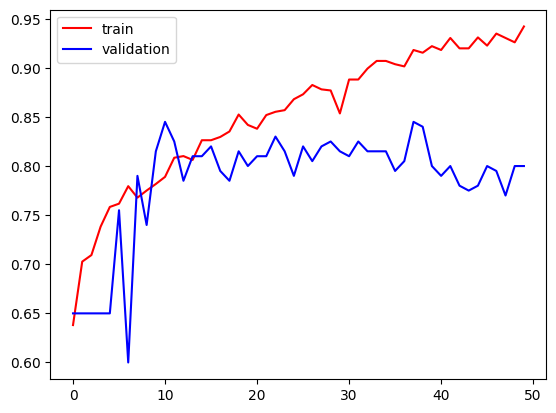

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

## Z model twiking

In [ ]:
model5 = Sequential()

model5.add(Conv2D(filters=16, kernel_size=(3, 3), activation="relu", input_shape=(28,28,1)))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2, 2)))
# model5.add(Dropout(0.2))

model5.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(BatchNormalization())
# model5.add(Dropout(0.2))

model5.add(Conv2D(filters=128, kernel_size=(3, 3), activation="relu"))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(BatchNormalization())
# model5.add(Dropout(0.2))

# model5.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
# model5.add(MaxPooling2D(pool_size=(2, 2)))
# model5.add(BatchNormalization())
# # model5.add(Dropout(0.1))

model5.add(Flatten())
model5.add(Dense(128, activation='relu'))
model5.add(Dropout(0.5))
model5.add(Dense(64, activation='relu'))
model5.add(Dropout(0.5))
model5.add(Dense(1, activation='sigmoid'))

In [ ]:
model5.summary()
model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model5.fit(x_train, y_train1, epochs=50, validation_data=(x_test, y_test1), batch_size=64)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 batch_normalization_36 (Bat  (None, 26, 26, 16)       64        
 chNormalization)                                                
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_45 (Conv2D)          (None, 11, 11, 64)        9280      
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                     

In [ ]:
model3.save('/content/drive/My Drive/t_models/zM1.h5')
model3.save_weights('/content/drive/My Drive/t_models_weights/ZM1_weights.h5')

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size = (3,3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size = (3,3),activation='relu'))
model.add(Conv2D(128, kernel_size = (3,3),activation='relu'))
model.add(Conv2D(256, kernel_size = (3,3),activation='relu'))
model.add(Conv2D(1024, kernel_size = (3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(84, activation='softmax'))


In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

history = model.fit(x_train, y_train1, epochs=20, validation_data=(x_test, y_test1), batch_size=32)

In [ ]:
score = model.evaluate(x_test, y_test1, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100,"%")

### T2

In [ ]:
x_train, x_test, y_train2, y_test2 = train_test_split(X, y_t2, random_state=8, test_size = 0.10)
x_train.shape

(1796, 28, 28, 1)

In [ ]:
M2 = keras.models.load_model('M1.h5')
M3 = keras.models.load_model('M1.h5')
M4 = keras.models.load_model('M1.h5')
M5 = keras.models.load_model('M1.h5')
M6 = keras.models.load_model('M1.h5')
M7 = keras.models.load_model('M1.h5')
M8 = keras.models.load_model('M1.h5')
M9 = keras.models.load_model('M1.h5')
M10 = keras.models.load_model('M1.h5')
M11= keras.models.load_model('M1.h5')

In [ ]:
# M2.compile(
#     optimizer=keras.optimizers.RMSprop(lr=1e-5),
#     loss='binary_crossentropy',
#     metrics=['accuracy']
#   )

M2.compile(optimizer ='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
  )

history = M2.fit(x_train, y_train2, epochs=5, validation_data=(x_test, y_test2), batch_size=32)

Epoch 1/5
57/57 [==============================] - 3s 13ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.8589 - val_accuracy: 0.8700
Epoch 2/5
57/57 [==============================] - 1s 9ms/step - loss: 0.0040 - accuracy: 0.9978 - val_loss: 0.8673 - val_accuracy: 0.8950
Epoch 3/5
57/57 [==============================] - 0s 8ms/step - loss: 0.0620 - accuracy: 0.9861 - val_loss: 0.8461 - val_accuracy: 0.8800
Epoch 4/5
57/57 [==============================] - 0s 6ms/step - loss: 0.0131 - accuracy: 0.9955 - val_loss: 0.7829 - val_accuracy: 0.8850
Epoch 5/5
57/57 [==============================] - 0s 6ms/step - loss: 0.0045 - accuracy: 0.9983 - val_loss: 0.8243 - val_accuracy: 0.9000


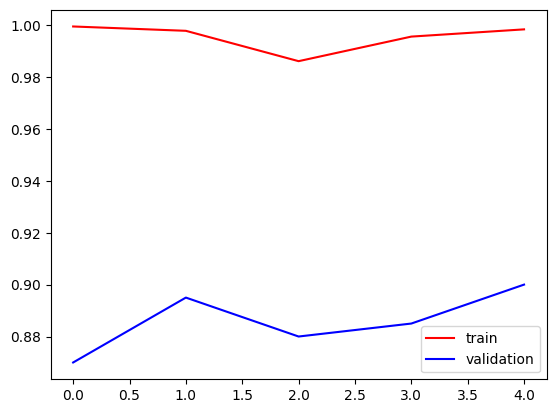

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
zM2 = keras.models.load_model('zM1.h5')

In [ ]:
zM2.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = zM2.fit(x_train, y_train2, epochs=5, validation_data=(x_test, y_test2), batch_size=32)

Epoch 1/5
57/57 [==============================] - 2s 8ms/step - loss: 0.0062 - accuracy: 0.9978 - val_loss: 0.8465 - val_accuracy: 0.8850
Epoch 2/5
57/57 [==============================] - 0s 6ms/step - loss: 0.0072 - accuracy: 0.9972 - val_loss: 0.7933 - val_accuracy: 0.9100
Epoch 3/5
57/57 [==============================] - 0s 6ms/step - loss: 0.0025 - accuracy: 0.9989 - val_loss: 0.7755 - val_accuracy: 0.8850
Epoch 4/5
57/57 [==============================] - 0s 6ms/step - loss: 0.0068 - accuracy: 0.9983 - val_loss: 0.7254 - val_accuracy: 0.9050
Epoch 5/5
57/57 [==============================] - 0s 6ms/step - loss: 0.0097 - accuracy: 0.9955 - val_loss: 0.6517 - val_accuracy: 0.9150


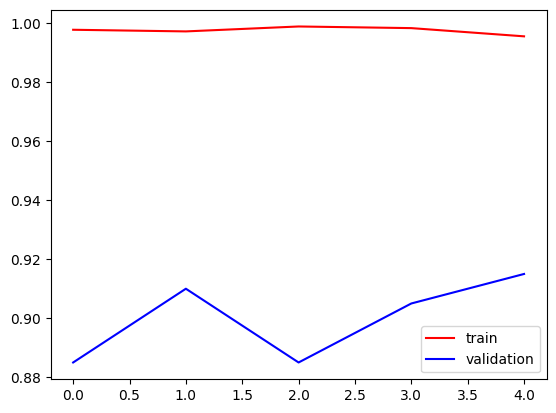

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
zM2.save('zM2.h5')
zM2.save_weights('ZM2_weights.h5')

In [ ]:
/content/drive/My Drive/images

In [ ]:
zM2.save('/content/drive/My Drive/t_models/zM2.h5')
zM2.save_weights('/content/drive/My Drive/t_models_weights/ZM2_weights.h5')

# T3

In [ ]:
x_train, x_test, y_train3, y_test3 = train_test_split(X, y_t3, random_state=8, test_size = 0.10)
x_train.shape

(1796, 28, 28, 1)

In [ ]:
M3.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
history = M3.fit(x_train, y_train3, epochs=50, validation_data=(x_test, y_test3), batch_size=32)

Epoch 1/50
57/57 [==============================] - 2s 9ms/step - loss: 0.0178 - accuracy: 0.9972 - val_loss: 2.6248 - val_accuracy: 0.7750
Epoch 2/50
57/57 [==============================] - 0s 8ms/step - loss: 0.0261 - accuracy: 0.9905 - val_loss: 2.0274 - val_accuracy: 0.7700
Epoch 3/50
57/57 [==============================] - 0s 9ms/step - loss: 0.0445 - accuracy: 0.9866 - val_loss: 1.9820 - val_accuracy: 0.7750
Epoch 4/50
57/57 [==============================] - 1s 9ms/step - loss: 0.0045 - accuracy: 0.9989 - val_loss: 2.1284 - val_accuracy: 0.7750
Epoch 5/50
57/57 [==============================] - 0s 8ms/step - loss: 0.0024 - accuracy: 0.9989 - val_loss: 2.0887 - val_accuracy: 0.7800
Epoch 6/50
57/57 [==============================] - 0s 8ms/step - loss: 0.0024 - accuracy: 0.9989 - val_loss: 2.1045 - val_accuracy: 0.7950
Epoch 7/50
57/57 [==============================] - 0s 8ms/step - loss: 2.0813e-04 - accuracy: 1.0000 - val_loss: 2.1863 - val_accuracy: 0.7750
Epoch 8/50
57/57

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
model.save('M3.h5',M3)
M3.save_weights('model3_weights.h5')

In [ ]:
zM3 = keras.models.load_model('zM1.h5')
zM3.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = zM3.fit(x_train, y_train3, epochs=50, validation_data=(x_test, y_test3), batch_size=32)

Epoch 1/50
57/57 [==============================] - 2s 9ms/step - loss: 0.4642 - accuracy: 0.7584 - val_loss: 0.4586 - val_accuracy: 0.7800
Epoch 2/50
57/57 [==============================] - 0s 6ms/step - loss: 0.3521 - accuracy: 0.8357 - val_loss: 0.4274 - val_accuracy: 0.7800
Epoch 3/50
57/57 [==============================] - 0s 6ms/step - loss: 0.3067 - accuracy: 0.8558 - val_loss: 0.3926 - val_accuracy: 0.8150
Epoch 4/50
57/57 [==============================] - 0s 6ms/step - loss: 0.2852 - accuracy: 0.8686 - val_loss: 0.4143 - val_accuracy: 0.8100
Epoch 5/50
57/57 [==============================] - 0s 6ms/step - loss: 0.2599 - accuracy: 0.8881 - val_loss: 0.4143 - val_accuracy: 0.8000
Epoch 6/50
57/57 [==============================] - 0s 6ms/step - loss: 0.2366 - accuracy: 0.8970 - val_loss: 0.4248 - val_accuracy: 0.7900
Epoch 7/50
57/57 [==============================] - 0s 6ms/step - loss: 0.2136 - accuracy: 0.9104 - val_loss: 0.4722 - val_accuracy: 0.8000
Epoch 8/50
57/57 [==

In [ ]:
zM3.save('zM3.h5')
zM3.save_weights('ZM3_weights.h5')

In [ ]:
zM3.save('/content/drive/My Drive/t_models/zM3.h5')
zM3.save_weights('/content/drive/My Drive/t_models_weights/ZM3_weights.h5')

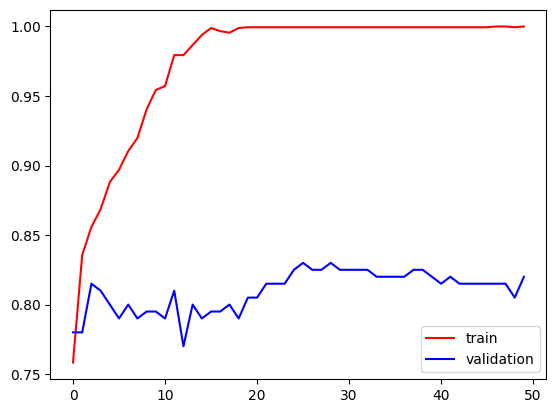

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

## M1 Fitting and accuracy t4

In [ ]:
x_train, x_test, y_train4, y_test4 = train_test_split(X, y_t4, random_state=8, test_size = 0.10)
x_train.shape

(1796, 28, 28, 1)

In [ ]:
M4.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = M4.fit(x_train, y_train4, epochs=50, validation_data=(x_test, y_test4), batch_size=32)

Epoch 1/50
57/57 [==============================] - 2s 10ms/step - loss: 0.0252 - accuracy: 0.9939 - val_loss: 1.7456 - val_accuracy: 0.8400
Epoch 2/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0102 - accuracy: 0.9955 - val_loss: 1.4826 - val_accuracy: 0.8400
Epoch 3/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0038 - accuracy: 0.9989 - val_loss: 1.7702 - val_accuracy: 0.8550
Epoch 4/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0136 - accuracy: 0.9978 - val_loss: 1.6861 - val_accuracy: 0.8450
Epoch 5/50
57/57 [==============================] - 0s 5ms/step - loss: 0.0062 - accuracy: 0.9972 - val_loss: 2.0278 - val_accuracy: 0.8500
Epoch 6/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0109 - accuracy: 0.9967 - val_loss: 1.6423 - val_accuracy: 0.8500
Epoch 7/50
57/57 [==============================] - 0s 5ms/step - loss: 0.0091 - accuracy: 0.9961 - val_loss: 1.5703 - val_accuracy: 0.8350
Epoch 8/50
57/57 [=

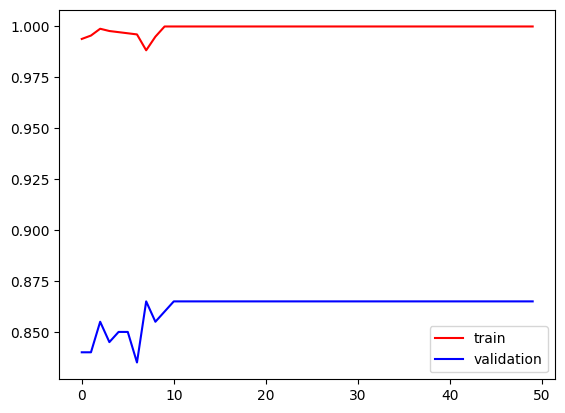

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
model.save('M4.h5',M4)
M4.save_weights('model4_weights.h5')

In [ ]:
zM4 = keras.models.load_model('zM1.h5')
zM4.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = zM4.fit(x_train, y_train4, epochs=50, validation_data=(x_test, y_test4), batch_size=32)

zM4.save('zM4.h5')
zM4.save_weights('ZM4_weights.h5')

Epoch 1/50
57/57 [==============================] - 2s 8ms/step - loss: 0.3546 - accuracy: 0.8168 - val_loss: 0.3099 - val_accuracy: 0.8550
Epoch 2/50
57/57 [==============================] - 0s 6ms/step - loss: 0.2138 - accuracy: 0.9081 - val_loss: 0.2653 - val_accuracy: 0.8900
Epoch 3/50
57/57 [==============================] - 0s 6ms/step - loss: 0.1855 - accuracy: 0.9254 - val_loss: 0.3032 - val_accuracy: 0.9000
Epoch 4/50
57/57 [==============================] - 0s 5ms/step - loss: 0.1561 - accuracy: 0.9337 - val_loss: 0.3509 - val_accuracy: 0.8950
Epoch 5/50
57/57 [==============================] - 0s 5ms/step - loss: 0.1433 - accuracy: 0.9427 - val_loss: 0.3077 - val_accuracy: 0.8650
Epoch 6/50
57/57 [==============================] - 0s 8ms/step - loss: 0.1242 - accuracy: 0.9471 - val_loss: 0.3893 - val_accuracy: 0.8850
Epoch 7/50
57/57 [==============================] - 0s 8ms/step - loss: 0.0999 - accuracy: 0.9621 - val_loss: 0.5445 - val_accuracy: 0.8750
Epoch 8/50
57/57 [==

In [ ]:
zM4.save('/content/drive/My Drive/t_models/zM4.h5')
zM4.save_weights('/content/drive/My Drive/t_models_weights/ZM4_weights.h5')

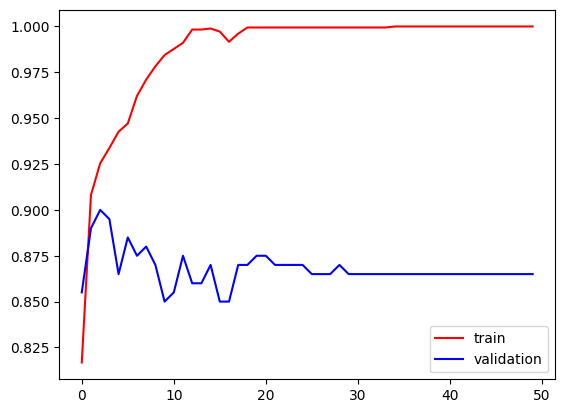

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

## T5

In [ ]:
x_train, x_test, y_train5, y_test5 = train_test_split(X, y_t5, random_state=8, test_size = 0.10)
x_train.shape

(1796, 28, 28, 1)

In [ ]:
M5.compile(
    optimizer=keras.optimizers.RMSprop(lr=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
  )


history = M5.fit(x_train, y_train5, epochs=50, validation_data=(x_test, y_test5), batch_size=32)

Epoch 1/50
57/57 [==============================] - 2s 10ms/step - loss: 0.5367 - accuracy: 0.7584 - val_loss: 0.5116 - val_accuracy: 0.8350
Epoch 2/50
57/57 [==============================] - 0s 8ms/step - loss: 0.4582 - accuracy: 0.7700 - val_loss: 0.3805 - val_accuracy: 0.8350
Epoch 3/50
57/57 [==============================] - 1s 9ms/step - loss: 0.4248 - accuracy: 0.8068 - val_loss: 0.3310 - val_accuracy: 0.8350
Epoch 4/50
57/57 [==============================] - 0s 8ms/step - loss: 0.3936 - accuracy: 0.8341 - val_loss: 0.3189 - val_accuracy: 0.8600
Epoch 5/50
57/57 [==============================] - 1s 9ms/step - loss: 0.3597 - accuracy: 0.8502 - val_loss: 0.2963 - val_accuracy: 0.8700
Epoch 6/50
57/57 [==============================] - 0s 8ms/step - loss: 0.3367 - accuracy: 0.8675 - val_loss: 0.3089 - val_accuracy: 0.8600
Epoch 7/50
57/57 [==============================] - 0s 8ms/step - loss: 0.2957 - accuracy: 0.8814 - val_loss: 0.5747 - val_accuracy: 0.7000
Epoch 8/50
57/57 [=

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
model.save('M5.h5',M5)
M5.save_weights('model5_weights.h5')

In [ ]:
zM5 = keras.models.load_model('zM1.h5')
zM5.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = zM5.fit(x_train, y_train5, epochs=50, validation_data=(x_test, y_test5), batch_size=32)

zM5.save('zM5.h5')
zM5.save_weights('ZM5_weights.h5')

Epoch 1/50
57/57 [==============================] - 2s 9ms/step - loss: 0.5450 - accuracy: 0.7500 - val_loss: 0.3973 - val_accuracy: 0.8350
Epoch 2/50
57/57 [==============================] - 0s 6ms/step - loss: 0.4419 - accuracy: 0.7867 - val_loss: 0.3756 - val_accuracy: 0.8350
Epoch 3/50
57/57 [==============================] - 0s 6ms/step - loss: 0.3779 - accuracy: 0.8280 - val_loss: 0.3389 - val_accuracy: 0.8500
Epoch 4/50
57/57 [==============================] - 0s 6ms/step - loss: 0.3228 - accuracy: 0.8641 - val_loss: 0.3152 - val_accuracy: 0.8700
Epoch 5/50
57/57 [==============================] - 0s 5ms/step - loss: 0.2522 - accuracy: 0.8925 - val_loss: 0.2933 - val_accuracy: 0.8800
Epoch 6/50
57/57 [==============================] - 0s 6ms/step - loss: 0.2177 - accuracy: 0.9187 - val_loss: 0.3169 - val_accuracy: 0.8650
Epoch 7/50
57/57 [==============================] - 0s 5ms/step - loss: 0.1754 - accuracy: 0.9343 - val_loss: 0.3250 - val_accuracy: 0.8700
Epoch 8/50
57/57 [==

In [ ]:
zM5.save('/content/drive/My Drive/t_models/zM5.h5')
zM5.save_weights('/content/drive/My Drive/t_models_weights/ZM5_weights.h5')

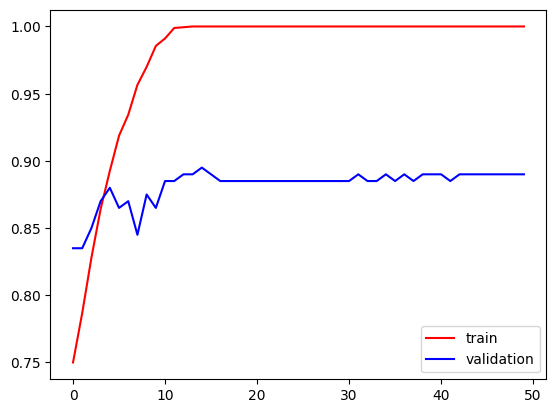

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

## T6

In [ ]:
x_train, x_test, y_train6, y_test6 = train_test_split(X, y_t6, random_state=8, test_size = 0.10)
x_train.shape

(1796, 28, 28, 1)

In [ ]:
M6.compile(
    optimizer=keras.optimizers.RMSprop(lr=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
  )


history = M6.fit(x_train, y_train6, epochs=50, validation_data=(x_test, y_test6), batch_size=32)

Epoch 1/50
57/57 [==============================] - 2s 12ms/step - loss: 0.4052 - accuracy: 0.7984 - val_loss: 0.3216 - val_accuracy: 0.8550
Epoch 2/50
57/57 [==============================] - 0s 8ms/step - loss: 0.3195 - accuracy: 0.8563 - val_loss: 0.2412 - val_accuracy: 0.8950
Epoch 3/50
57/57 [==============================] - 0s 8ms/step - loss: 0.2935 - accuracy: 0.8680 - val_loss: 0.2702 - val_accuracy: 0.8600
Epoch 4/50
57/57 [==============================] - 1s 9ms/step - loss: 0.2703 - accuracy: 0.8769 - val_loss: 0.2328 - val_accuracy: 0.8750
Epoch 5/50
57/57 [==============================] - 0s 8ms/step - loss: 0.2534 - accuracy: 0.8859 - val_loss: 0.2951 - val_accuracy: 0.8550
Epoch 6/50
57/57 [==============================] - 0s 8ms/step - loss: 0.2405 - accuracy: 0.8970 - val_loss: 0.2218 - val_accuracy: 0.8900
Epoch 7/50
57/57 [==============================] - 0s 7ms/step - loss: 0.2191 - accuracy: 0.9020 - val_loss: 0.2541 - val_accuracy: 0.8950
Epoch 8/50
57/57 [=

In [ ]:
zM6 = keras.models.load_model('zM1.h5')
zM6.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = zM6.fit(x_train, y_train6, epochs=50, validation_data=(x_test, y_test6), batch_size=32)

zM6.save('zM6.h5')
zM6.save_weights('ZM6_weights.h5')

Epoch 1/50
57/57 [==============================] - 3s 13ms/step - loss: 0.4451 - accuracy: 0.7439 - val_loss: 0.2986 - val_accuracy: 0.8900
Epoch 2/50
57/57 [==============================] - 0s 8ms/step - loss: 0.3226 - accuracy: 0.8497 - val_loss: 0.2708 - val_accuracy: 0.8850
Epoch 3/50
57/57 [==============================] - 0s 6ms/step - loss: 0.3004 - accuracy: 0.8541 - val_loss: 0.2893 - val_accuracy: 0.8600
Epoch 4/50
57/57 [==============================] - 0s 6ms/step - loss: 0.2692 - accuracy: 0.8758 - val_loss: 0.2415 - val_accuracy: 0.8750
Epoch 5/50
57/57 [==============================] - 0s 5ms/step - loss: 0.2493 - accuracy: 0.8881 - val_loss: 0.2415 - val_accuracy: 0.8650
Epoch 6/50
57/57 [==============================] - 0s 6ms/step - loss: 0.2156 - accuracy: 0.9031 - val_loss: 0.2425 - val_accuracy: 0.8800
Epoch 7/50
57/57 [==============================] - 0s 6ms/step - loss: 0.1963 - accuracy: 0.9137 - val_loss: 0.2652 - val_accuracy: 0.8800
Epoch 8/50
57/57 [=

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
M6.save('zM6.h5',M6)
M6.save_weights('zModel6_weights.h5')

In [ ]:
M6.save('/content/drive/My Drive/t_models/zM6.h5')
M6.save_weights('/content/drive/My Drive/t_models_weights/ZM6_weights.h5')

## T7

In [ ]:
x_train, x_test, y_train7, y_test7 = train_test_split(X, y_t7, random_state=8, test_size = 0.10)
x_train.shape

(1796, 28, 28, 1)

In [ ]:
M7.compile(
    optimizer=keras.optimizers.RMSprop(lr=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
  )


history = M7.fit(x_train, y_train7, epochs=50, validation_data=(x_test, y_test7), batch_size=32)

Epoch 1/50
57/57 [==============================] - 2s 9ms/step - loss: 0.5236 - accuracy: 0.7589 - val_loss: 0.6217 - val_accuracy: 0.7700
Epoch 2/50
57/57 [==============================] - 0s 6ms/step - loss: 0.4342 - accuracy: 0.8096 - val_loss: 0.5347 - val_accuracy: 0.7800
Epoch 3/50
57/57 [==============================] - 0s 6ms/step - loss: 0.3806 - accuracy: 0.8330 - val_loss: 0.4148 - val_accuracy: 0.8200
Epoch 4/50
57/57 [==============================] - 0s 5ms/step - loss: 0.3271 - accuracy: 0.8591 - val_loss: 0.4074 - val_accuracy: 0.8300
Epoch 5/50
57/57 [==============================] - 0s 5ms/step - loss: 0.2898 - accuracy: 0.8769 - val_loss: 0.4978 - val_accuracy: 0.8300
Epoch 6/50
57/57 [==============================] - 0s 6ms/step - loss: 0.2704 - accuracy: 0.8853 - val_loss: 0.4190 - val_accuracy: 0.8100
Epoch 7/50
57/57 [==============================] - 0s 8ms/step - loss: 0.2397 - accuracy: 0.8937 - val_loss: 0.4208 - val_accuracy: 0.8450
Epoch 8/50
57/57 [==

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
model.save('M7.h5',M7)
M7.save_weights('model7_weights.h5')

In [ ]:
zM7 = keras.models.load_model('zM1.h5')
zM7.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = zM7.fit(x_train, y_train7, epochs=50, validation_data=(x_test, y_test7), batch_size=32)


Epoch 1/50
57/57 [==============================] - 3s 12ms/step - loss: 0.5304 - accuracy: 0.7483 - val_loss: 0.5058 - val_accuracy: 0.7750
Epoch 2/50
57/57 [==============================] - 0s 8ms/step - loss: 0.4371 - accuracy: 0.8107 - val_loss: 0.4435 - val_accuracy: 0.8150
Epoch 3/50
57/57 [==============================] - 0s 9ms/step - loss: 0.3718 - accuracy: 0.8363 - val_loss: 0.4038 - val_accuracy: 0.8100
Epoch 4/50
57/57 [==============================] - 1s 11ms/step - loss: 0.3113 - accuracy: 0.8641 - val_loss: 0.4050 - val_accuracy: 0.8250
Epoch 5/50
57/57 [==============================] - 1s 10ms/step - loss: 0.2679 - accuracy: 0.8925 - val_loss: 0.3826 - val_accuracy: 0.8600
Epoch 6/50
57/57 [==============================] - 0s 8ms/step - loss: 0.2230 - accuracy: 0.9081 - val_loss: 0.3904 - val_accuracy: 0.8300
Epoch 7/50
57/57 [==============================] - 1s 9ms/step - loss: 0.1875 - accuracy: 0.9287 - val_loss: 0.4776 - val_accuracy: 0.7850
Epoch 8/50
57/57 

In [ ]:
M7.save('zM3.h5')
M7.save_weights('ZM3_weights.h5')

In [ ]:
M7.save('/content/drive/My Drive/t_models/zM7.h5')
M7.save_weights('/content/drive/My Drive/t_models_weights/ZM7_weights.h5')

## T8

In [ ]:
x_train, x_test, y_train8, y_test8 = train_test_split(X, y_t8, random_state=8, test_size = 0.10)
x_train.shape

(1796, 28, 28, 1)

In [ ]:
M8.compile(
    optimizer=keras.optimizers.RMSprop(lr=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
  )


history = M8.fit(x_train, y_train8, epochs=50, validation_data=(x_test, y_test8), batch_size=32)

Epoch 1/50
57/57 [==============================] - 3s 12ms/step - loss: 0.3916 - accuracy: 0.8268 - val_loss: 0.3430 - val_accuracy: 0.8500
Epoch 2/50
57/57 [==============================] - 0s 8ms/step - loss: 0.2878 - accuracy: 0.8831 - val_loss: 0.3435 - val_accuracy: 0.8650
Epoch 3/50
57/57 [==============================] - 0s 6ms/step - loss: 0.2613 - accuracy: 0.8870 - val_loss: 0.3381 - val_accuracy: 0.8450
Epoch 4/50
57/57 [==============================] - 0s 6ms/step - loss: 0.2465 - accuracy: 0.8920 - val_loss: 0.3173 - val_accuracy: 0.8600
Epoch 5/50
57/57 [==============================] - 0s 5ms/step - loss: 0.2325 - accuracy: 0.9059 - val_loss: 0.3090 - val_accuracy: 0.8650
Epoch 6/50
57/57 [==============================] - 0s 5ms/step - loss: 0.2187 - accuracy: 0.9092 - val_loss: 0.3945 - val_accuracy: 0.8350
Epoch 7/50
57/57 [==============================] - 0s 6ms/step - loss: 0.1974 - accuracy: 0.9137 - val_loss: 0.3610 - val_accuracy: 0.8600
Epoch 8/50
57/57 [=

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
model.save('M8.h5',M8)
M8.save_weights('model8_weights.h5')

In [ ]:
zM8 = keras.models.load_model('zM1.h5')
zM8.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = zM8.fit(x_train, y_train8, epochs=50, validation_data=(x_test, y_test8), batch_size=32)


Epoch 1/50
57/57 [==============================] - 4s 13ms/step - loss: 0.4148 - accuracy: 0.8235 - val_loss: 0.3333 - val_accuracy: 0.8700
Epoch 2/50
57/57 [==============================] - 1s 9ms/step - loss: 0.2754 - accuracy: 0.8814 - val_loss: 0.3301 - val_accuracy: 0.8500
Epoch 3/50
57/57 [==============================] - 0s 8ms/step - loss: 0.2422 - accuracy: 0.8948 - val_loss: 0.3333 - val_accuracy: 0.8550
Epoch 4/50
57/57 [==============================] - 0s 8ms/step - loss: 0.2314 - accuracy: 0.8998 - val_loss: 0.3434 - val_accuracy: 0.8500
Epoch 5/50
57/57 [==============================] - 0s 9ms/step - loss: 0.1989 - accuracy: 0.9193 - val_loss: 0.3096 - val_accuracy: 0.8550
Epoch 6/50
57/57 [==============================] - 0s 8ms/step - loss: 0.1820 - accuracy: 0.9220 - val_loss: 0.3684 - val_accuracy: 0.8500
Epoch 7/50
57/57 [==============================] - 0s 6ms/step - loss: 0.1595 - accuracy: 0.9365 - val_loss: 0.3764 - val_accuracy: 0.8300
Epoch 8/50
57/57 [=

In [ ]:
M8.save('/content/drive/My Drive/t_models/zM8.h5')
M8.save_weights('/content/drive/My Drive/t_models_weights/ZM8_weights.h5')


## T9

In [ ]:
x_train, x_test, y_train9, y_test9 = train_test_split(X, y_t9, random_state=8, test_size = 0.10)
x_train.shape

(1796, 28, 28, 1)

In [ ]:
M9.compile(
    optimizer=keras.optimizers.RMSprop(lr=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
  )


history = M9.fit(x_train, y_train9, epochs=50, validation_data=(x_test, y_test9), batch_size=32)

Epoch 1/50
57/57 [==============================] - 2s 8ms/step - loss: 0.7002 - accuracy: 0.5367 - val_loss: 0.6472 - val_accuracy: 0.6350
Epoch 2/50
57/57 [==============================] - 0s 6ms/step - loss: 0.6745 - accuracy: 0.5896 - val_loss: 0.6688 - val_accuracy: 0.6250
Epoch 3/50
57/57 [==============================] - 0s 6ms/step - loss: 0.6481 - accuracy: 0.6308 - val_loss: 0.5945 - val_accuracy: 0.6600
Epoch 4/50
57/57 [==============================] - 0s 5ms/step - loss: 0.5898 - accuracy: 0.6876 - val_loss: 0.6031 - val_accuracy: 0.6650
Epoch 5/50
57/57 [==============================] - 0s 6ms/step - loss: 0.5277 - accuracy: 0.7394 - val_loss: 0.5502 - val_accuracy: 0.7050
Epoch 6/50
57/57 [==============================] - 0s 7ms/step - loss: 0.4626 - accuracy: 0.7840 - val_loss: 0.6339 - val_accuracy: 0.7050
Epoch 7/50
57/57 [==============================] - 1s 9ms/step - loss: 0.3970 - accuracy: 0.8213 - val_loss: 0.5489 - val_accuracy: 0.7600
Epoch 8/50
57/57 [==

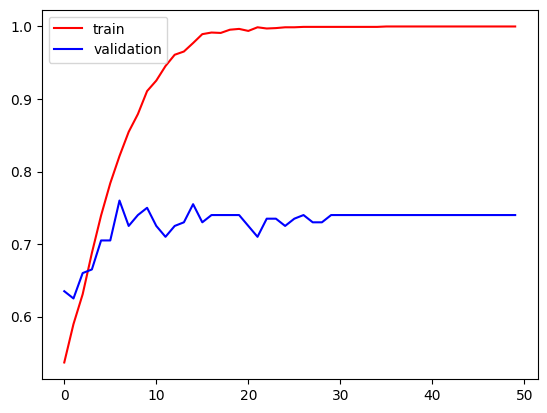

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
model.save('M9.h5',M9)
M9.save_weights('model9_weights.h5')

In [ ]:
zM9 = keras.models.load_model('zM1.h5')
zM9.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = zM9.fit(x_train, y_train9, epochs=50, validation_data=(x_test, y_test9), batch_size=32)


Epoch 1/50
57/57 [==============================] - 3s 13ms/step - loss: 0.7098 - accuracy: 0.5301 - val_loss: 0.6665 - val_accuracy: 0.6050
Epoch 2/50
57/57 [==============================] - 1s 9ms/step - loss: 0.6819 - accuracy: 0.5813 - val_loss: 0.6577 - val_accuracy: 0.6500
Epoch 3/50
57/57 [==============================] - 0s 8ms/step - loss: 0.6592 - accuracy: 0.6080 - val_loss: 0.6767 - val_accuracy: 0.5850
Epoch 4/50
57/57 [==============================] - 1s 10ms/step - loss: 0.6240 - accuracy: 0.6526 - val_loss: 0.6150 - val_accuracy: 0.6800
Epoch 5/50
57/57 [==============================] - 1s 10ms/step - loss: 0.5438 - accuracy: 0.7216 - val_loss: 0.5554 - val_accuracy: 0.7050
Epoch 6/50
57/57 [==============================] - 1s 10ms/step - loss: 0.4391 - accuracy: 0.8035 - val_loss: 0.5272 - val_accuracy: 0.7250
Epoch 7/50
57/57 [==============================] - 1s 10ms/step - loss: 0.3472 - accuracy: 0.8480 - val_loss: 0.5880 - val_accuracy: 0.7150
Epoch 8/50
57/5

In [ ]:
zM9.save('/content/drive/My Drive/t_models/zM9.h5')
zM9.save_weights('/content/drive/My Drive/t_models_weights/ZM9_weights.h5')

## T10

In [ ]:
x_train, x_test, y_train10, y_test10 = train_test_split(X, y_t10, random_state=8, test_size = 0.10)
x_train.shape

(1796, 28, 28, 1)

In [ ]:
M10.compile(
    optimizer=keras.optimizers.RMSprop(lr=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
  )


history = M10.fit(x_train, y_train10, epochs=50, validation_data=(x_test, y_test10), batch_size=32)

Epoch 1/50
57/57 [==============================] - 3s 9ms/step - loss: 3.1234e-06 - accuracy: 1.0000 - val_loss: 0.8646 - val_accuracy: 0.9150
Epoch 2/50
57/57 [==============================] - 0s 6ms/step - loss: 3.0099e-06 - accuracy: 1.0000 - val_loss: 0.8663 - val_accuracy: 0.9150
Epoch 3/50
57/57 [==============================] - 0s 5ms/step - loss: 2.9181e-06 - accuracy: 1.0000 - val_loss: 0.8782 - val_accuracy: 0.9150
Epoch 4/50
57/57 [==============================] - 0s 6ms/step - loss: 2.8436e-06 - accuracy: 1.0000 - val_loss: 0.8745 - val_accuracy: 0.9150
Epoch 5/50
57/57 [==============================] - 0s 6ms/step - loss: 2.7369e-06 - accuracy: 1.0000 - val_loss: 0.8732 - val_accuracy: 0.9150
Epoch 6/50
57/57 [==============================] - 0s 5ms/step - loss: 2.6549e-06 - accuracy: 1.0000 - val_loss: 0.8762 - val_accuracy: 0.9150
Epoch 7/50
57/57 [==============================] - 0s 6ms/step - loss: 2.5765e-06 - accuracy: 1.0000 - val_loss: 0.8783 - val_accuracy:

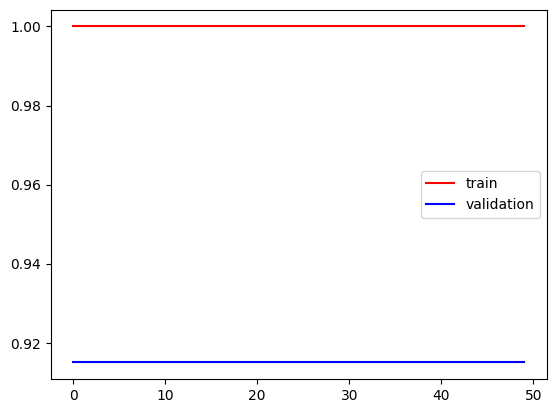

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
model.save('M10.h5',M10)
M10.save_weights('model10_weights.h5')

In [ ]:
zM10 = keras.models.load_model('zM1.h5')
zM10.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = zM10.fit(x_train, y_train10, epochs=50, validation_data=(x_test, y_test10), batch_size=32)

Epoch 1/50
57/57 [==============================] - 2s 9ms/step - loss: 0.2495 - accuracy: 0.8903 - val_loss: 0.1776 - val_accuracy: 0.9150
Epoch 2/50
57/57 [==============================] - 0s 6ms/step - loss: 0.1588 - accuracy: 0.9343 - val_loss: 0.1841 - val_accuracy: 0.9150
Epoch 3/50
57/57 [==============================] - 0s 6ms/step - loss: 0.1440 - accuracy: 0.9449 - val_loss: 0.1753 - val_accuracy: 0.9250
Epoch 4/50
57/57 [==============================] - 0s 6ms/step - loss: 0.1301 - accuracy: 0.9449 - val_loss: 0.1605 - val_accuracy: 0.9150
Epoch 5/50
57/57 [==============================] - 0s 5ms/step - loss: 0.1209 - accuracy: 0.9510 - val_loss: 0.1697 - val_accuracy: 0.9250
Epoch 6/50
57/57 [==============================] - 0s 6ms/step - loss: 0.1029 - accuracy: 0.9588 - val_loss: 0.2153 - val_accuracy: 0.9250
Epoch 7/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0945 - accuracy: 0.9627 - val_loss: 0.1755 - val_accuracy: 0.9050
Epoch 8/50
57/57 [==

In [ ]:
zM10.save('/content/drive/My Drive/t_models/zM10.h5')
zM10.save_weights('/content/drive/My Drive/t_models_weights/ZM10_weights.h5')

## T11

In [ ]:
x_train, x_test, y_train11, y_test11 = train_test_split(X, y_t11, random_state=8, test_size = 0.10)
x_train.shape

(1796, 28, 28, 1)

In [ ]:
M11.compile(
    optimizer=keras.optimizers.RMSprop(lr=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
  )


history = M11.fit(x_train, y_train11, epochs=50, validation_data=(x_test, y_test11), batch_size=32)

Epoch 1/50
57/57 [==============================] - 2s 8ms/step - loss: 0.5549 - accuracy: 0.7339 - val_loss: 0.5000 - val_accuracy: 0.7850
Epoch 2/50
57/57 [==============================] - 0s 6ms/step - loss: 0.4686 - accuracy: 0.7678 - val_loss: 0.4880 - val_accuracy: 0.7750
Epoch 3/50
57/57 [==============================] - 0s 6ms/step - loss: 0.4314 - accuracy: 0.7918 - val_loss: 0.4735 - val_accuracy: 0.7850
Epoch 4/50
57/57 [==============================] - 0s 6ms/step - loss: 0.4093 - accuracy: 0.7906 - val_loss: 0.4825 - val_accuracy: 0.7750
Epoch 5/50
57/57 [==============================] - 0s 5ms/step - loss: 0.3777 - accuracy: 0.8146 - val_loss: 0.5054 - val_accuracy: 0.7850
Epoch 6/50
57/57 [==============================] - 0s 6ms/step - loss: 0.3568 - accuracy: 0.8302 - val_loss: 0.5393 - val_accuracy: 0.7150
Epoch 7/50
57/57 [==============================] - 0s 5ms/step - loss: 0.3204 - accuracy: 0.8435 - val_loss: 0.5518 - val_accuracy: 0.7800
Epoch 8/50
57/57 [==

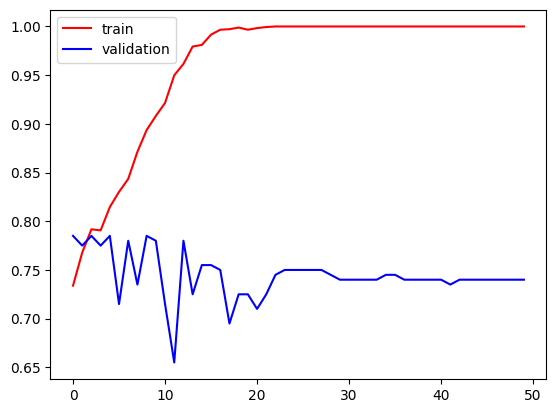

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
model.save('M11.h5',M11)
M11.save_weights('model11_weights.h5')

In [ ]:
zM11 = keras.models.load_model('zM1.h5')
zM11.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = zM11.fit(x_train, y_train11, epochs=10, validation_data=(x_test, y_test11), batch_size=32)


Epoch 1/10
57/57 [==============================] - 2s 9ms/step - loss: 0.5696 - accuracy: 0.7316 - val_loss: 0.4984 - val_accuracy: 0.7750
Epoch 2/10
57/57 [==============================] - 0s 7ms/step - loss: 0.4717 - accuracy: 0.7584 - val_loss: 0.4552 - val_accuracy: 0.7900
Epoch 3/10
57/57 [==============================] - 0s 6ms/step - loss: 0.4221 - accuracy: 0.7801 - val_loss: 0.4652 - val_accuracy: 0.7750
Epoch 4/10
57/57 [==============================] - 0s 6ms/step - loss: 0.3936 - accuracy: 0.8012 - val_loss: 0.4787 - val_accuracy: 0.7800
Epoch 5/10
57/57 [==============================] - 0s 6ms/step - loss: 0.3516 - accuracy: 0.8235 - val_loss: 0.4960 - val_accuracy: 0.7800
Epoch 6/10
57/57 [==============================] - 0s 6ms/step - loss: 0.3055 - accuracy: 0.8508 - val_loss: 0.5193 - val_accuracy: 0.7650
Epoch 7/10
57/57 [==============================] - 0s 6ms/step - loss: 0.2516 - accuracy: 0.8842 - val_loss: 0.5898 - val_accuracy: 0.7700
Epoch 8/10
57/57 [==

In [ ]:
M11.save('/content/drive/My Drive/t_models/zM11.h5')
M11.save_weights('/content/drive/My Drive/t_models_weights/ZM11_weights.h5')

### Prediction Over an Image

In [ ]:
import cv2
import keras
import numpy as np
import os
import tensorflow as tf
import numpy as np

In [ ]:
# Load the image using the provided filename
test_img = tf.keras.utils.load_img('/content/77.png', color_mode='grayscale')
test_img = tf.keras.preprocessing.image.img_to_array(test_img, dtype=np.float32)

# Convert the loaded image to a numpy array
test_img = tf.keras.utils.img_to_array(test_img)

# Normalize the pixel values of the image between 0 and 1
test_img = test_img/255.0

# Reshape the image to a 4D tensor with dimensions (1, height, width,channel)
test_img = np.reshape(test_img,(1,28,28,1))
print(test_img.shape)

(1, 28, 28, 1)


In [ ]:
# Define a dictionary that maps index to label
label_map2 = {
    0: 'Well-organized and emotionally stable',
    1: 'High self-esteem and ambitions',
    2: 'Tendency to long-term procrastinate',
    3: 'Tendency to be Lazy, may lack self-discipline.',
    4: 'Pessimistic tendency',
    5: 'Tendency to be impatient',
    6: 'Optimistic',
    7: 'High level of enthusiasm ',
    8: 'Level headed enthusiast',
    9: 'Low Ambitions and self esteem',
    10: 'May lack motivation'
}


In [ ]:
label_map1 = {
    0: 'Balanced Crossbar',
    1: 'High Crossbar',
    2: 'Left Dominant Crossbar',
    3: 'Short Length Crossbar',
    4: 'Down Sloping',
    5: 'Right Dominant Crossbar',
    6: 'Upsloping',
    7: 'Lengthy Crossbar',
    8: 'Flat Crossbar',
    9: 'Low Crossbar',
    10: 'Medium Length Crossbar'
}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.models import load_model

loaded_models = []

# Load the models and their weights
for i in range(11):
    model_file = f'/content/drive/My Drive/t_models/zM{i+1}.h5'
    weight_file = f'/content/drive/My Drive/t_models_weights/ZM{i+1}_weights.h5'
    model = load_model(model_file)
    model.load_weights(weight_file)
    loaded_models.append(model)

# Set the saved weights to each model
for i in range(11):
    loaded_models[i].set_weights(loaded_models[i].get_weights())

In [ ]:
predList = []

for i in range(11):
        predictions = model.predict(test_img)
        predList.append(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [ ]:
for i, pred in enumerate(predList):
    label1 = label_map1[i]

    # If pred is a numpy array, round it using np.round
    if isinstance(pred, np.ndarray):
        pred_rounded = np.round(pred, 3)
        print(f'{label1}: {pred_rounded}')
    else:
        print(f'{label1}: {pred:.3f}')

    label2 = label_map2[i]
    if np.round(pred, 3) <= 0:
        print(f'{label2}: Trait is Absent')
        print('\n*************************************************************')
    else:
        print(f'{label2}: Trait is Present')
        print('\n*************************************************************')

Balanced Crossbar: [[0.]]
Well-organized and emotionally stable: Trait is Absent

*************************************************************
High Crossbar: [[0.]]
High self-esteem and ambitions: Trait is Absent

*************************************************************
Left Dominant Crossbar: [[0.]]
Tendency to long-term procrastinate: Trait is Absent

*************************************************************
Short Length Crossbar: [[0.]]
Tendency to be Lazy, may lack self-discipline.: Trait is Absent

*************************************************************
Down Sloping: [[0.]]
Pessimistic tendency: Trait is Absent

*************************************************************
Right Dominant Crossbar: [[0.]]
Tendency to be impatient: Trait is Absent

*************************************************************
Upsloping: [[0.]]
Optimistic: Trait is Absent

*************************************************************
Lengthy Crossbar: [[0.]]
High level of enthusiasm :

## Predicting for the folder of t images

In [ ]:
# Define the directory where the test images are stored
test_dir = '/path/to/test/images/'

# Loop through the images in the directory and make predictions using the loaded models
for img_file in os.listdir(test_dir):
    img_path = os.path.join(test_dir, img_file)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = tf.keras.utils.img_to_array(img)
    imgs = np.reshape(1,28,28,1)

    # Make predictions using each of the loaded models
    for i, model in enumerate(loaded_models):
        predictions = model.predict(img)
        print(f"Model {i+1}: {predictions}")
        label1 = label_map1[i]
        print(f'{label}: [{pred}]')
        print(f'{label1}: [{pred}]')
        label2 = label_map2[i]
        print(f'{label2}: [{pred}]')
        print('*************************************************************')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import cv2
import keras
import numpy as np
import os
import tensorflow as tf

# Define a dictionary that maps index to label
label_map2 = {
    0: 'Well-organized and emotionally stable',
    1: 'High self-esteem and ambitions',
    2: 'Tendency to long-term procrastinate',
    3: 'Tendency to be Lazy, may lack self-discipline.',
    4: 'Pessimistic tendency',
    5: 'Tendency to be impatient',
    6: 'Optimistic',
    7: 'High level of enthusiasm ',
    8: 'Level headed enthusiast',
    9: 'Low Ambitions and self esteem',
    10: 'May lack motivation'
}
label_map1 = {
    0: 'Balanced Crossbar',
    1: 'High Crossbar',
    2: 'Left Dominant Crossbar',
    3: 'Short Length Crossbar',
    4: 'Down Sloping',
    5: 'Right Dominant Crossbar',
    6: 'Upsloping',
    7: 'Lengthy Crossbar',
    8: 'Flat Crossbar',
    9: 'Low Crossbar',
    10: 'Medium Length Crossbar'
}

from keras.models import load_model
loaded_models = []

# Load the models and their weights
for i in range(11):
    model_file = f'zM{i+1}.h5'
    weight_file = f'./t_models_weights/ZM{i+1}_weights.h5'
    model = load_model(model_file)
    model.load_weights(weight_file)
    loaded_models.append(model)

# Set the saved weights to each model
for i in range(11):
    loaded_models[i].set_weights(loaded_models[i].get_weights())

# Define the directory where the test images are stored
test_dir = '/content/77.jpeg'
predList = []
# Loop through the images in the directory and make predictions using the loaded models
for img_file in os.listdir(test_dir):
    img_path = os.path.join(test_dir, img_file)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = tf.keras.utils.img_to_array(img)
    img = np.reshape(img,(1,28,28,1))

    # Make predictions using each of the loaded models
    for i in range(11):
        predictions = model.predict(img)
        predList.append(predictions)
        for i, pred in enumerate(predList): #if predList[i]>0.96:

            label1 = label_map1[i]
            print(f'{label1}: [{pred}]')
            label2 = label_map2[i]
            print(f'{label2}: [{pred}]')
            print('*************************************************************')